In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('social.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df = df.iloc[:,2:]

In [11]:
df.sample(5)
X = df[['Age','EstimatedSalary']]
Y = df['Purchased']

In [8]:
from sklearn.model_selection import train_test_split


In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [35]:
x_train.shape

(280, 2)

In [16]:
from sklearn.preprocessing import StandardScaler


In [17]:
scaler = StandardScaler()

In [18]:
#scaler object learns about the parameters through fit function.
scaler.fit(x_train)


StandardScaler()

In [36]:
#transform the value
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


(280, 2)

In [37]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [39]:
x_train_scaled

,Age,EstimatedSalary
0,-0.126693,-0.519089
1,-0.612637,0.579310
2,-0.223881,-0.578462
3,0.164874,1.083979
4,0.164874,1.558962
...,...,...
275,0.845196,-0.311284
276,-0.223881,0.223072
277,-0.807015,-0.786267
278,-0.223881,2.301123


In [40]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.0,0.0
75%,0.8,0.5
max,2.2,2.4


Text(0.5, 1.0, 'before standardization')

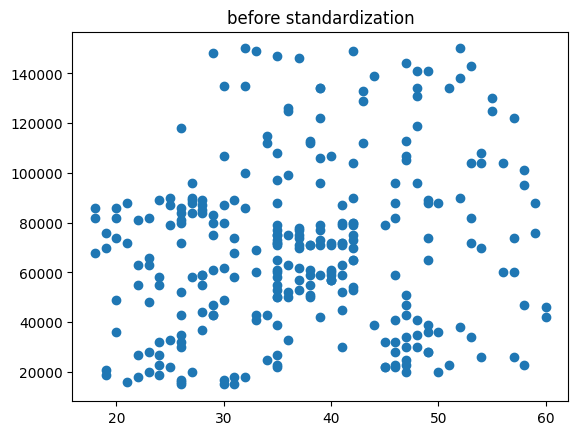

In [43]:
plt.scatter(x_train['Age'],x_train['EstimatedSalary'])
plt.title("before standardization")

Text(0.5, 1.0, 'After Standardization')

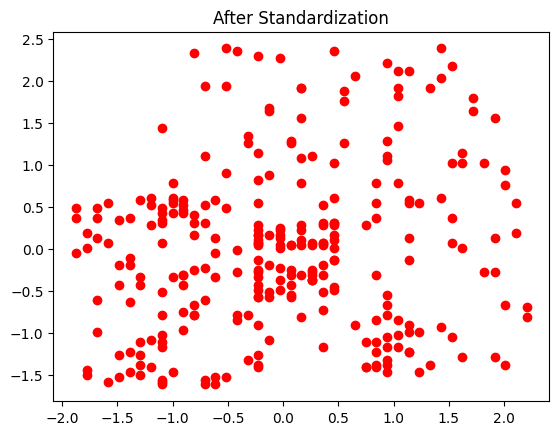

In [45]:
plt.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
plt.title("After Standardization")

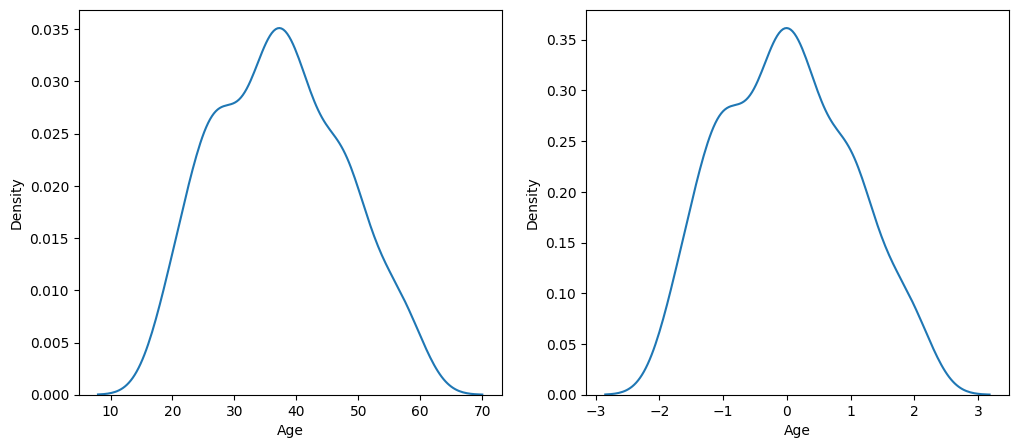

In [64]:
fig ,( ax1, ax2)= plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x_train['Age'],ax=ax1)

sns.kdeplot(x_train_scaled['Age'],ax = ax2)
plt.show()


## diffrence in algorithm 

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
model = LogisticRegression()
Scaled_model = LogisticRegression()

In [68]:
model.fit(x_train,y_train)
Scaled_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [73]:
pred = model.predict(x_test)
s_pred = Scaled_model.predict(x_test_scaled)

In [70]:
from sklearn.metrics import accuracy_score


In [75]:
print("Actual Scored " + str(accuracy_score(y_test,pred)))
print("Scaled Scored  "+ str(accuracy_score(y_test,s_pred)))
      

Actual Scored 0.8583333333333333
Scaled Scored  0.8333333333333334


In [76]:
from sklearn.tree import DecisionTreeClassifier 

In [77]:
model = DecisionTreeClassifier()
Scaled_model = DecisionTreeClassifier()

In [78]:
model.fit(x_train,y_train)
Scaled_model.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [79]:
pred = model.predict(x_test)
s_pred = Scaled_model.predict(x_test_scaled)

In [80]:
print("Actual Scored " + str(accuracy_score(y_test,pred)))
print("Scaled Scored  "+ str(accuracy_score(y_test,s_pred)))

Actual Scored 0.8583333333333333
Scaled Scored  0.825
